# Part 1:
In the first section, we aim to perform emotion classification using a Multilayer Perceptron (MLP). The dataset to be used is the FER 2013 dataset, which contains 7 data classes divided into three groups: train, test, and validation. The dataset can be downloaded from this link.

Note: We will exclude the disgust class from this experiment.

Task Instructions:
Visualize Data: First, plot one image from each class of the dataset.
Build a Simple Neural Network:
Design a single-layer neural network (without any hidden layers) for classification.
Report the accuracy and loss on both the training and validation data after each epoch.
Experiment Settings:
The choice of optimizer, learning rate, number of epochs, and batch size is up to you.
Visualize Results:
Finally, plot the accuracy and loss for each epoch to observe the convergence trend

###  (*)The Single Layer Case:
In this scenario, we aimed to maintain good accuracy. However, we encountered difficulties because the model's capacity is low and cannot adequately capture the data. As a result, we achieved a maximum test accuracy of 37%.

Examining the trend of losses, we observe that, by the end of training, the training loss is significantly lower than the validation loss. This discrepancy indicates that the model is underfitting, meaning it struggles to generalize well to new, unseen data.

running on cuda


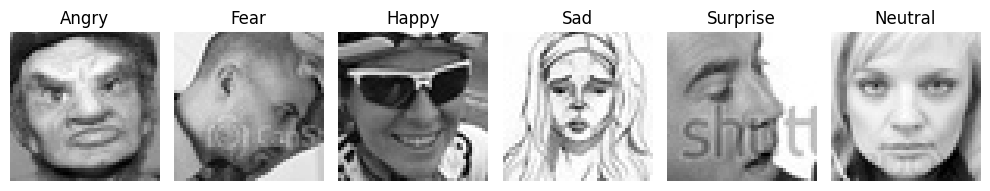

Epoch 1/20
354/354 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2508 - loss: 1.7923 - val_accuracy: 0.3254 - val_loss: 1.7075
Epoch 2/20
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3227 - loss: 1.6789 - val_accuracy: 0.3132 - val_loss: 1.7005
Epoch 3/20
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3373 - loss: 1.6650 - val_accuracy: 0.3411 - val_loss: 1.6261
Epoch 4/20
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3417 - loss: 1.6424 - val_accuracy: 0.3362 - val_loss: 1.7038
Epoch 5/20
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3466 - loss: 1.6391 - val_accuracy: 0.3553 - val_loss: 1.6104
Epoch 6/20
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3560 - loss: 1.6176 - val_accuracy: 0.3096 - val_loss: 1.6807
Epoch 7/20
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3553 - loss: 1.6288 - val_accuracy: 0.3485 - val_loss: 1.6432
Epoch 8/20
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3629 - loss: 1.6099 - val_accuracy: 0.

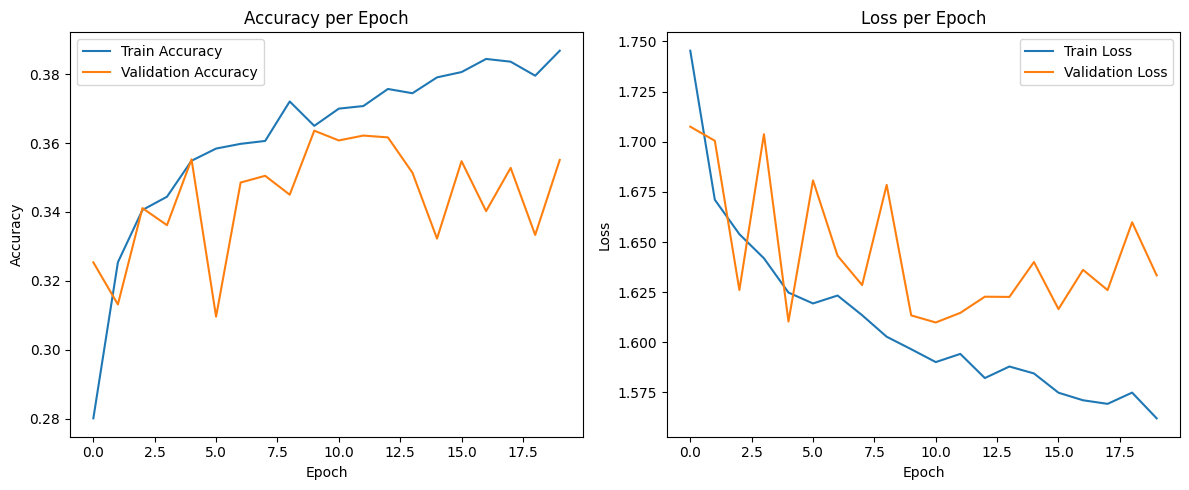

111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3502 - loss: 1.6321
Test Accuracy: 36.09%
Test Loss: 1.6157


In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import torch
from PIL import Image

if torch.cuda.is_available():
    torch.device = 'cuda'
else:
    torch.device = 'cpu'
print(f'running on {torch.device}')

# Define paths (Update these paths as per your dataset location)
data_path = "C:\\Users\\USER\\Downloads\\FER-2013\\"
train_path = os.path.join(data_path, "train")
test_path = os.path.join(data_path, "test")

# Emotion labels in FER-2013 dataset
emotion_labels = {
    0: "Angry",
    1: "Disgust",
    2: "Fear",
    3: "Happy",
    4: "Sad",
    5: "Surprise",
    6: "Neutral"
}

# Custom function to convert image to array
def custom_img_to_array(img):
    img_array = np.asarray(img, dtype="float32")
    img_array /= 255.0  # Normalize pixel values to [0, 1]
    return img_array

# Function to load and preprocess the data
def load_data(data_dir, exclude_class=1):
    images, labels = [], []
    for label, emotion in emotion_labels.items():
        if label == exclude_class:  # Skip "Disgust" class
            continue
        emotion_dir = os.path.join(data_dir, emotion)

        # Debugging: Check if folder exists
        if not os.path.exists(emotion_dir):
            print(f"Directory not found: {emotion_dir}")
            continue

        for file_name in os.listdir(emotion_dir):
            img_path = os.path.join(emotion_dir, file_name)

            # Load and preprocess the image
            img = load_img(img_path, target_size=(48, 48), color_mode="grayscale")
            img_array = custom_img_to_array(img)  # Use custom function
            images.append(img_array)
            labels.append(label)

    images, labels = np.array(images), np.array(labels)
    return shuffle(images, labels, random_state=42)

# Load and preprocess training and testing data
exclude_class = 1  # Define the class to exclude
X_train, y_train = load_data(train_path, exclude_class)
X_test, y_test = load_data(test_path, exclude_class)

# Correct num_classes to include only valid labels
num_classes = len(emotion_labels) - 1  # Exclude "Disgust"
if exclude_class in emotion_labels:
    del emotion_labels[exclude_class]

# Re-map the labels to a new range
label_map = {label: idx for idx, (label, _) in enumerate(emotion_labels.items())}
mapped_labels = np.vectorize(label_map.get)(y_train)
mapped_labels_test = np.vectorize(label_map.get)(y_test)

# Convert labels to one-hot encoding
y_train = to_categorical(mapped_labels, num_classes=num_classes)
y_test = to_categorical(mapped_labels_test, num_classes=num_classes)

# Split training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Visualize one image from each class
unique_labels = np.unique(np.argmax(y_train, axis=1))
plt.figure(figsize=(10, 5))
for i, label in enumerate(unique_labels):
    idx = np.argmax(np.argmax(y_train, axis=1) == label)
    plt.subplot(1, len(unique_labels), i + 1)
    plt.imshow(X_train[idx].reshape(48, 48), cmap="gray")
    plt.title(emotion_labels[label] if label < 1 else emotion_labels[label + 1])
    plt.axis("off")
plt.tight_layout()
plt.show()

# Build a simple single-layer neural network (MLP)
model = Sequential([
    Flatten(input_shape=(48, 48, 1)),  # Flatten the 48x48 grayscale image
    Dense(num_classes, activation="softmax")  # Output layer with softmax activation
])

# Compile the model
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# Train the model
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=20,
                    batch_size=64)

# Visualize training history
def plot_metrics(history):
    plt.figure(figsize=(12, 5))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy per Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss per Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_metrics(history)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


### Part 2
### (*) The Multiple Layer Case:
As we added more layers to the model, we increased its capacity to capture the data, which resulted in improved accuracy. Specifically, we achieved a 41% accuracy on the test set, which is an improvement compared to the single-layer case.

running on cuda
Epoch 1/30
354/354 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.2524 - loss: 1.7703 - val_accuracy: 0.2518 - val_loss: 1.7401
Epoch 2/30
354/354 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.2664 - loss: 1.7293 - val_accuracy: 0.2943 - val_loss: 1.6798
Epoch 3/30
354/354 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.3331 - loss: 1.6459 - val_accuracy: 0.3197 - val_loss: 1.6523
Epoch 4/30
354/354 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.3477 - loss: 1.6118 - val_accuracy: 0.3330 - val_loss: 1.6314
Epoch 5/30
354/354 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.3601 - loss: 1.5889 - val_accuracy: 0.3558 - val_loss: 1.6029
Epoch 6/30
354/354 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.3724 - loss: 1.5720 - val_accuracy: 0.3436 - val_loss: 1.6067
Epoch 7/30
354/354 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.3845 - loss: 1.5470 - val_accuracy: 0.3632 - val_loss: 1.5891
Epoch 8/30
354/354 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.3790 - loss: 1.5505 -

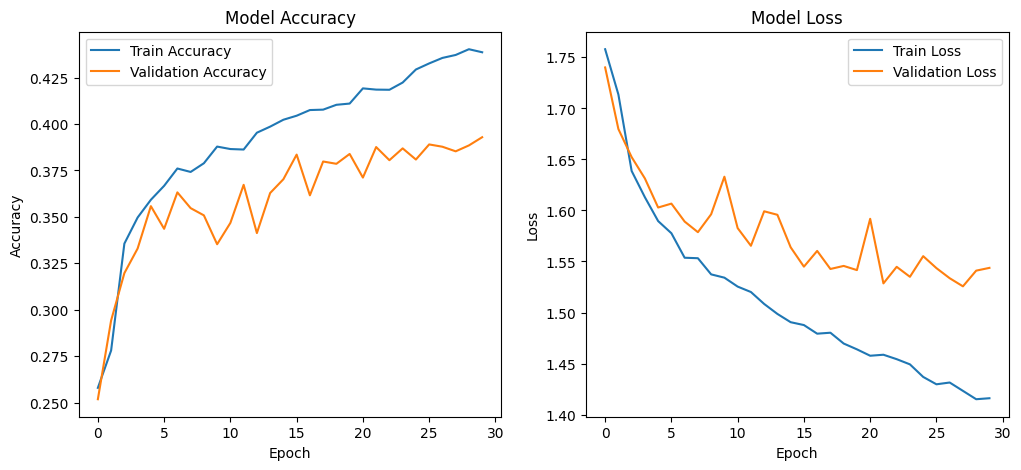

111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3899 - loss: 1.5377
Test Accuracy: 40.87%
Test Loss: 1.5126


In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow.keras.optimizers import Adam
import torch
from PIL import Image

if torch.cuda.is_available():
    torch.device = 'cuda'
else:
    torch.device = 'cpu'
print(f'running on {torch.device}')

# Define paths (Update these paths as per your dataset location)
data_path = "C:\\Users\\USER\\Downloads\\FER-2013\\"
train_path = os.path.join(data_path, "train")
test_path = os.path.join(data_path, "test")

# Emotion labels in FER-2013 dataset
emotion_labels = {
    0: "Angry",
    1: "Disgust",
    2: "Fear",
    3: "Happy",
    4: "Sad",
    5: "Surprise",
    6: "Neutral"
}

# Custom function to convert image to array
def custom_img_to_array(img):
    img_array = np.asarray(img, dtype="float32")
    img_array /= 255.0  # Normalize pixel values to [0, 1]
    return img_array

# Function to load and preprocess the data
def load_data(data_dir, exclude_class=1):
    images, labels = [], []
    for label, emotion in emotion_labels.items():
        if label == exclude_class:  # Skip "Disgust" class
            continue
        emotion_dir = os.path.join(data_dir, emotion)

        # Debugging: Check if folder exists
        if not os.path.exists(emotion_dir):
            print(f"Directory not found: {emotion_dir}")
            continue

        for file_name in os.listdir(emotion_dir):
            img_path = os.path.join(emotion_dir, file_name)

            # Load and preprocess the image
            img = load_img(img_path, target_size=(48, 48), color_mode="grayscale")
            img_array = custom_img_to_array(img)  # Use custom function
            images.append(img_array)
            labels.append(label)

    images, labels = np.array(images), np.array(labels)
    return shuffle(images, labels, random_state=42)

# Load and preprocess training and testing data
X_train, y_train = load_data(train_path)
X_test, y_test = load_data(test_path)

# Adjust labels to account for excluding the "Disgust" class
y_train = np.where(y_train > 1, y_train - 1, y_train)
y_test = np.where(y_test > 1, y_test - 1, y_test)

# Convert labels to one-hot encoding
num_classes = len(emotion_labels) - 1  # Exclude "Disgust"
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

# Design a neural network with hidden layers
model = Sequential([
    Flatten(input_shape=(48, 48, 1)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Train the model and record the history
history = model.fit(X_train, y_train, 
                    validation_split=0.2, 
                    epochs=30, 
                    batch_size=64, 
                    verbose=1)

# Plot the accuracy and loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


# Part 3:
In this section we investigate the effect of `learning rate`, `batch size`, `optimizers`, `number of epochs`:
### 3.1: effect of `number of epochs`:

Directory not found: C:\Users\USER\Downloads\FER-2013\train\Sad
Directory not found: C:\Users\USER\Downloads\FER-2013\train\Surprise
Epoch 1/30
228/228 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3810 - loss: 1.3455 - val_accuracy: 0.4132 - val_loss: 1.3195
Epoch 2/30
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4257 - loss: 1.2672 - val_accuracy: 0.4269 - val_loss: 1.2587
Epoch 3/30
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4441 - loss: 1.2386 - val_accuracy: 0.4508 - val_loss: 1.2390
Epoch 4/30
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4546 - loss: 1.2231 - val_accuracy: 0.4360 - val_loss: 1.2592
Epoch 5/30
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4663 - loss: 1.2093 - val_accuracy: 0.4489 - val_loss: 1.2253
Epoch 6/30
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4736 - loss: 1.1971 - val_accuracy: 0.4565 - val_loss: 1.2164
Epoch 7/30
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4811 - loss: 1.1857 - val_accurac

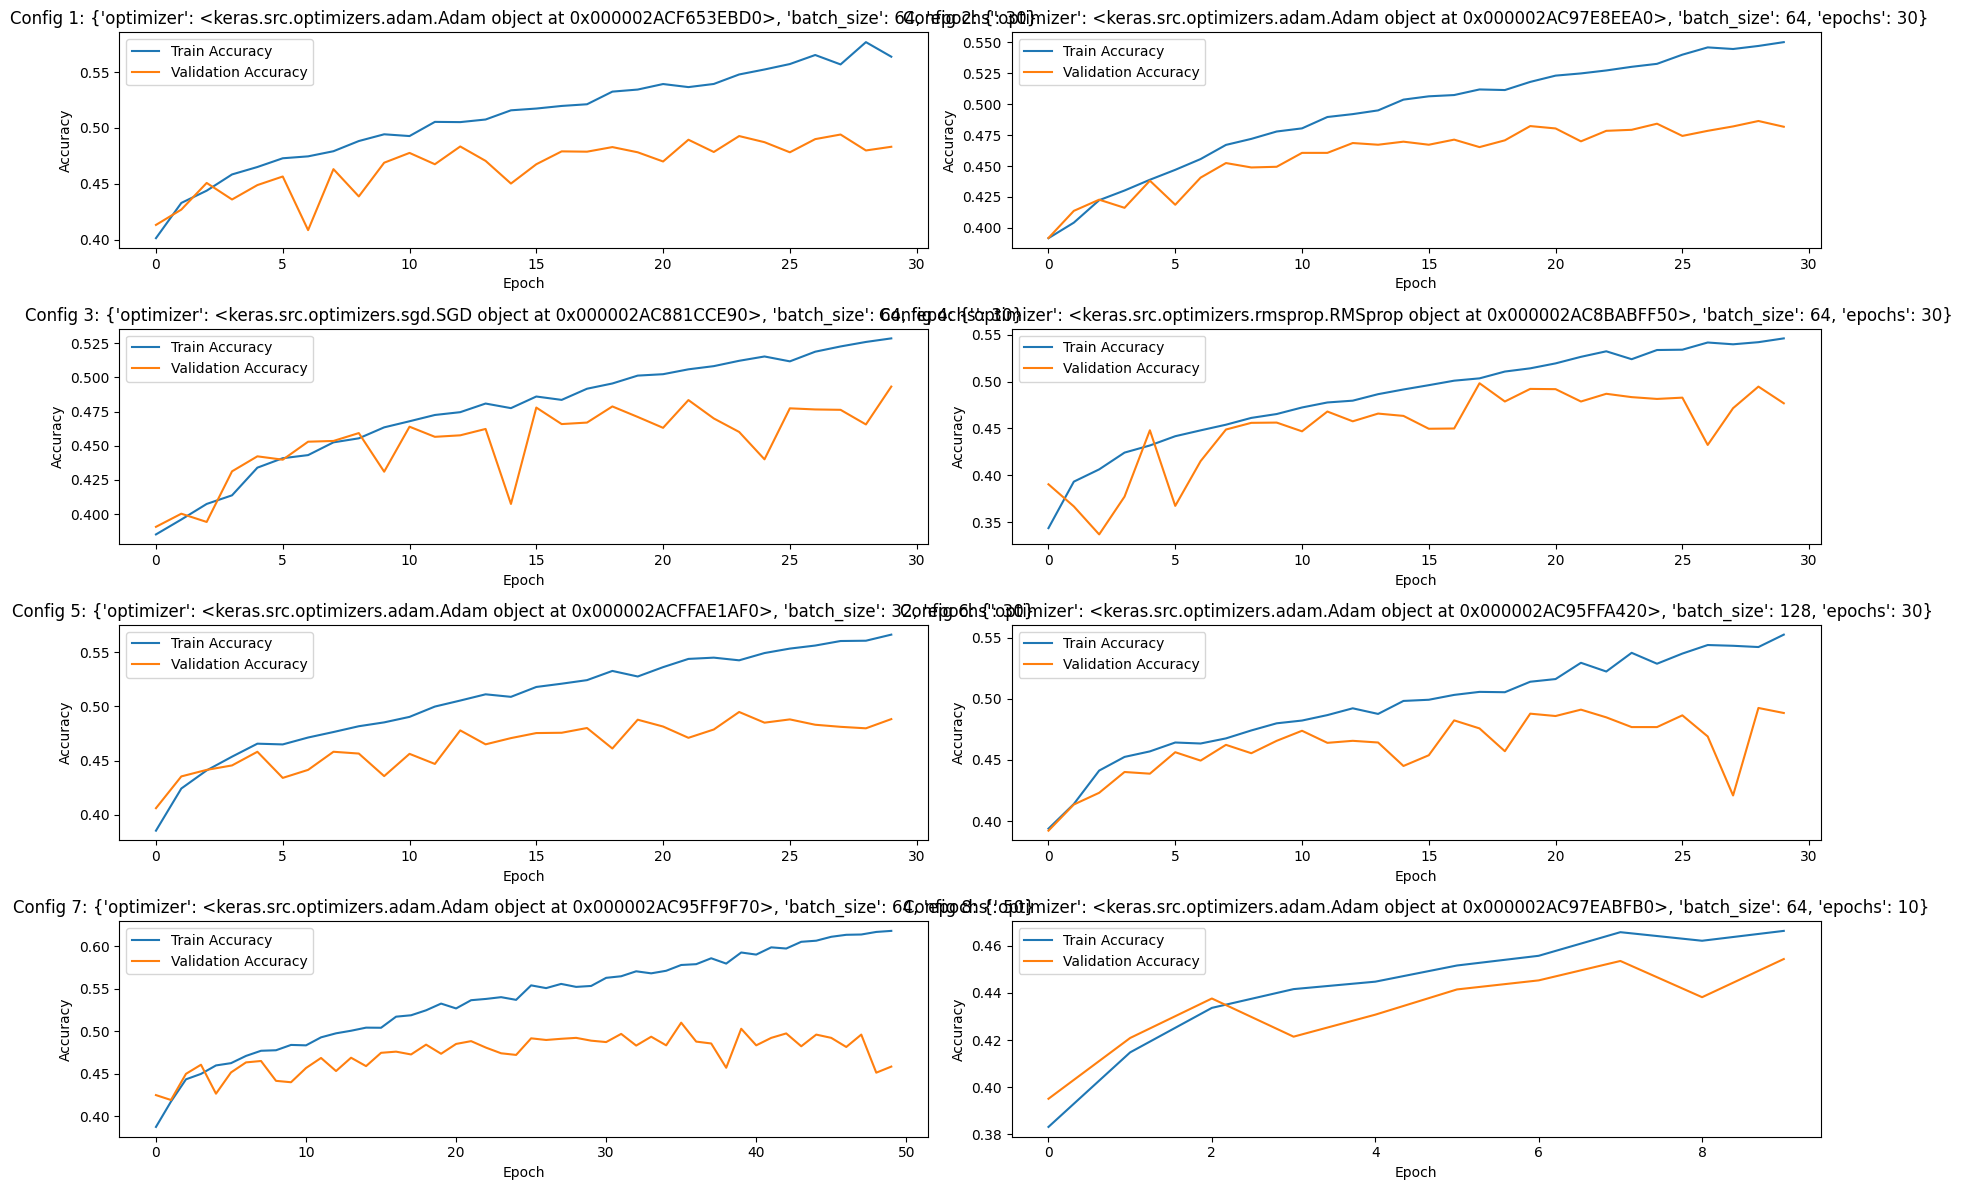

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import os
from keras.preprocessing.image import load_img, img_to_array
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import Adam, SGD, RMSprop
from sklearn.utils import shuffle

# Class labels
emotion_labels = {
    0: "Angry",
    1: "Disgust",
    2: "Fear",
    3: "Happy",
    4: "Sad",
    5: "Surprise",
    6: "Neutral"
}

def load_data(data_dir, exclude_class=1):
    images, labels = [], []
    for label, emotion in emotion_labels.items():
        if label == exclude_class:  # Skip "Disgust" class
            continue
        emotion_dir = os.path.join(data_dir, emotion)
        
        if not os.path.exists(emotion_dir):
            print(f"Directory not found: {emotion_dir}")
            continue
        
        for file_name in os.listdir(emotion_dir):
            img_path = os.path.join(emotion_dir, file_name)
            img = load_img(img_path, target_size=(48, 48), color_mode="grayscale")
            img_array = img_to_array(img) / 255.0
            images.append(img_array)
            labels.append(label)
    
    images, labels = np.array(images), np.array(labels)
    return shuffle(images, labels, random_state=42)

data_path = "C:\\Users\\USER\\Downloads\\FER-2013\\"
train_path = os.path.join(data_path, "train")
test_path = os.path.join(data_path, "test")

X_train, y_train = load_data(train_path)
X_test, y_test = load_data(test_path)

# Adjust labels to account for excluding the "Disgust" class
y_train = np.where(y_train > 1, y_train - 1, y_train)
y_test = np.where(y_test > 1, y_test - 1, y_test)

# Convert labels to one-hot encoding
num_classes = len(emotion_labels) - 1  # Exclude "Disgust"
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

def create_model():
    model = Sequential([
        Flatten(input_shape=(48, 48, 1)),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    return model

# Experiment configurations
configs = [
    {'optimizer': Adam(learning_rate=0.001), 'batch_size': 64, 'epochs': 30},
    {'optimizer': Adam(learning_rate=0.0001), 'batch_size': 64, 'epochs': 30},
    {'optimizer': SGD(learning_rate=0.01), 'batch_size': 64, 'epochs': 30},
    {'optimizer': RMSprop(learning_rate=0.001), 'batch_size': 64, 'epochs': 30},
    {'optimizer': Adam(learning_rate=0.001), 'batch_size': 32, 'epochs': 30},
    {'optimizer': Adam(learning_rate=0.001), 'batch_size': 128, 'epochs': 30},
    {'optimizer': Adam(learning_rate=0.001), 'batch_size': 64, 'epochs': 50},
    {'optimizer': Adam(learning_rate=0.001), 'batch_size': 64, 'epochs': 10},
]

# Store results
results = []

for config in configs:
    model = create_model()
    model.compile(optimizer=config['optimizer'], 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])
    
    history = model.fit(X_train, y_train, 
                        validation_split=0.2, 
                        epochs=config['epochs'], 
                        batch_size=config['batch_size'], 
                        verbose=1)
    
    results.append({
        'config': config,
        'history': history.history
    })

# Plot results
plt.figure(figsize=(18, 12))

for i, result in enumerate(results):
    plt.subplot(4, 2, i+1)
    plt.plot(result['history']['accuracy'], label='Train Accuracy')
    plt.plot(result['history']['val_accuracy'], label='Validation Accuracy')
    plt.title(f"Config {i+1}: {result['config']}")
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

plt.tight_layout()
plt.show()


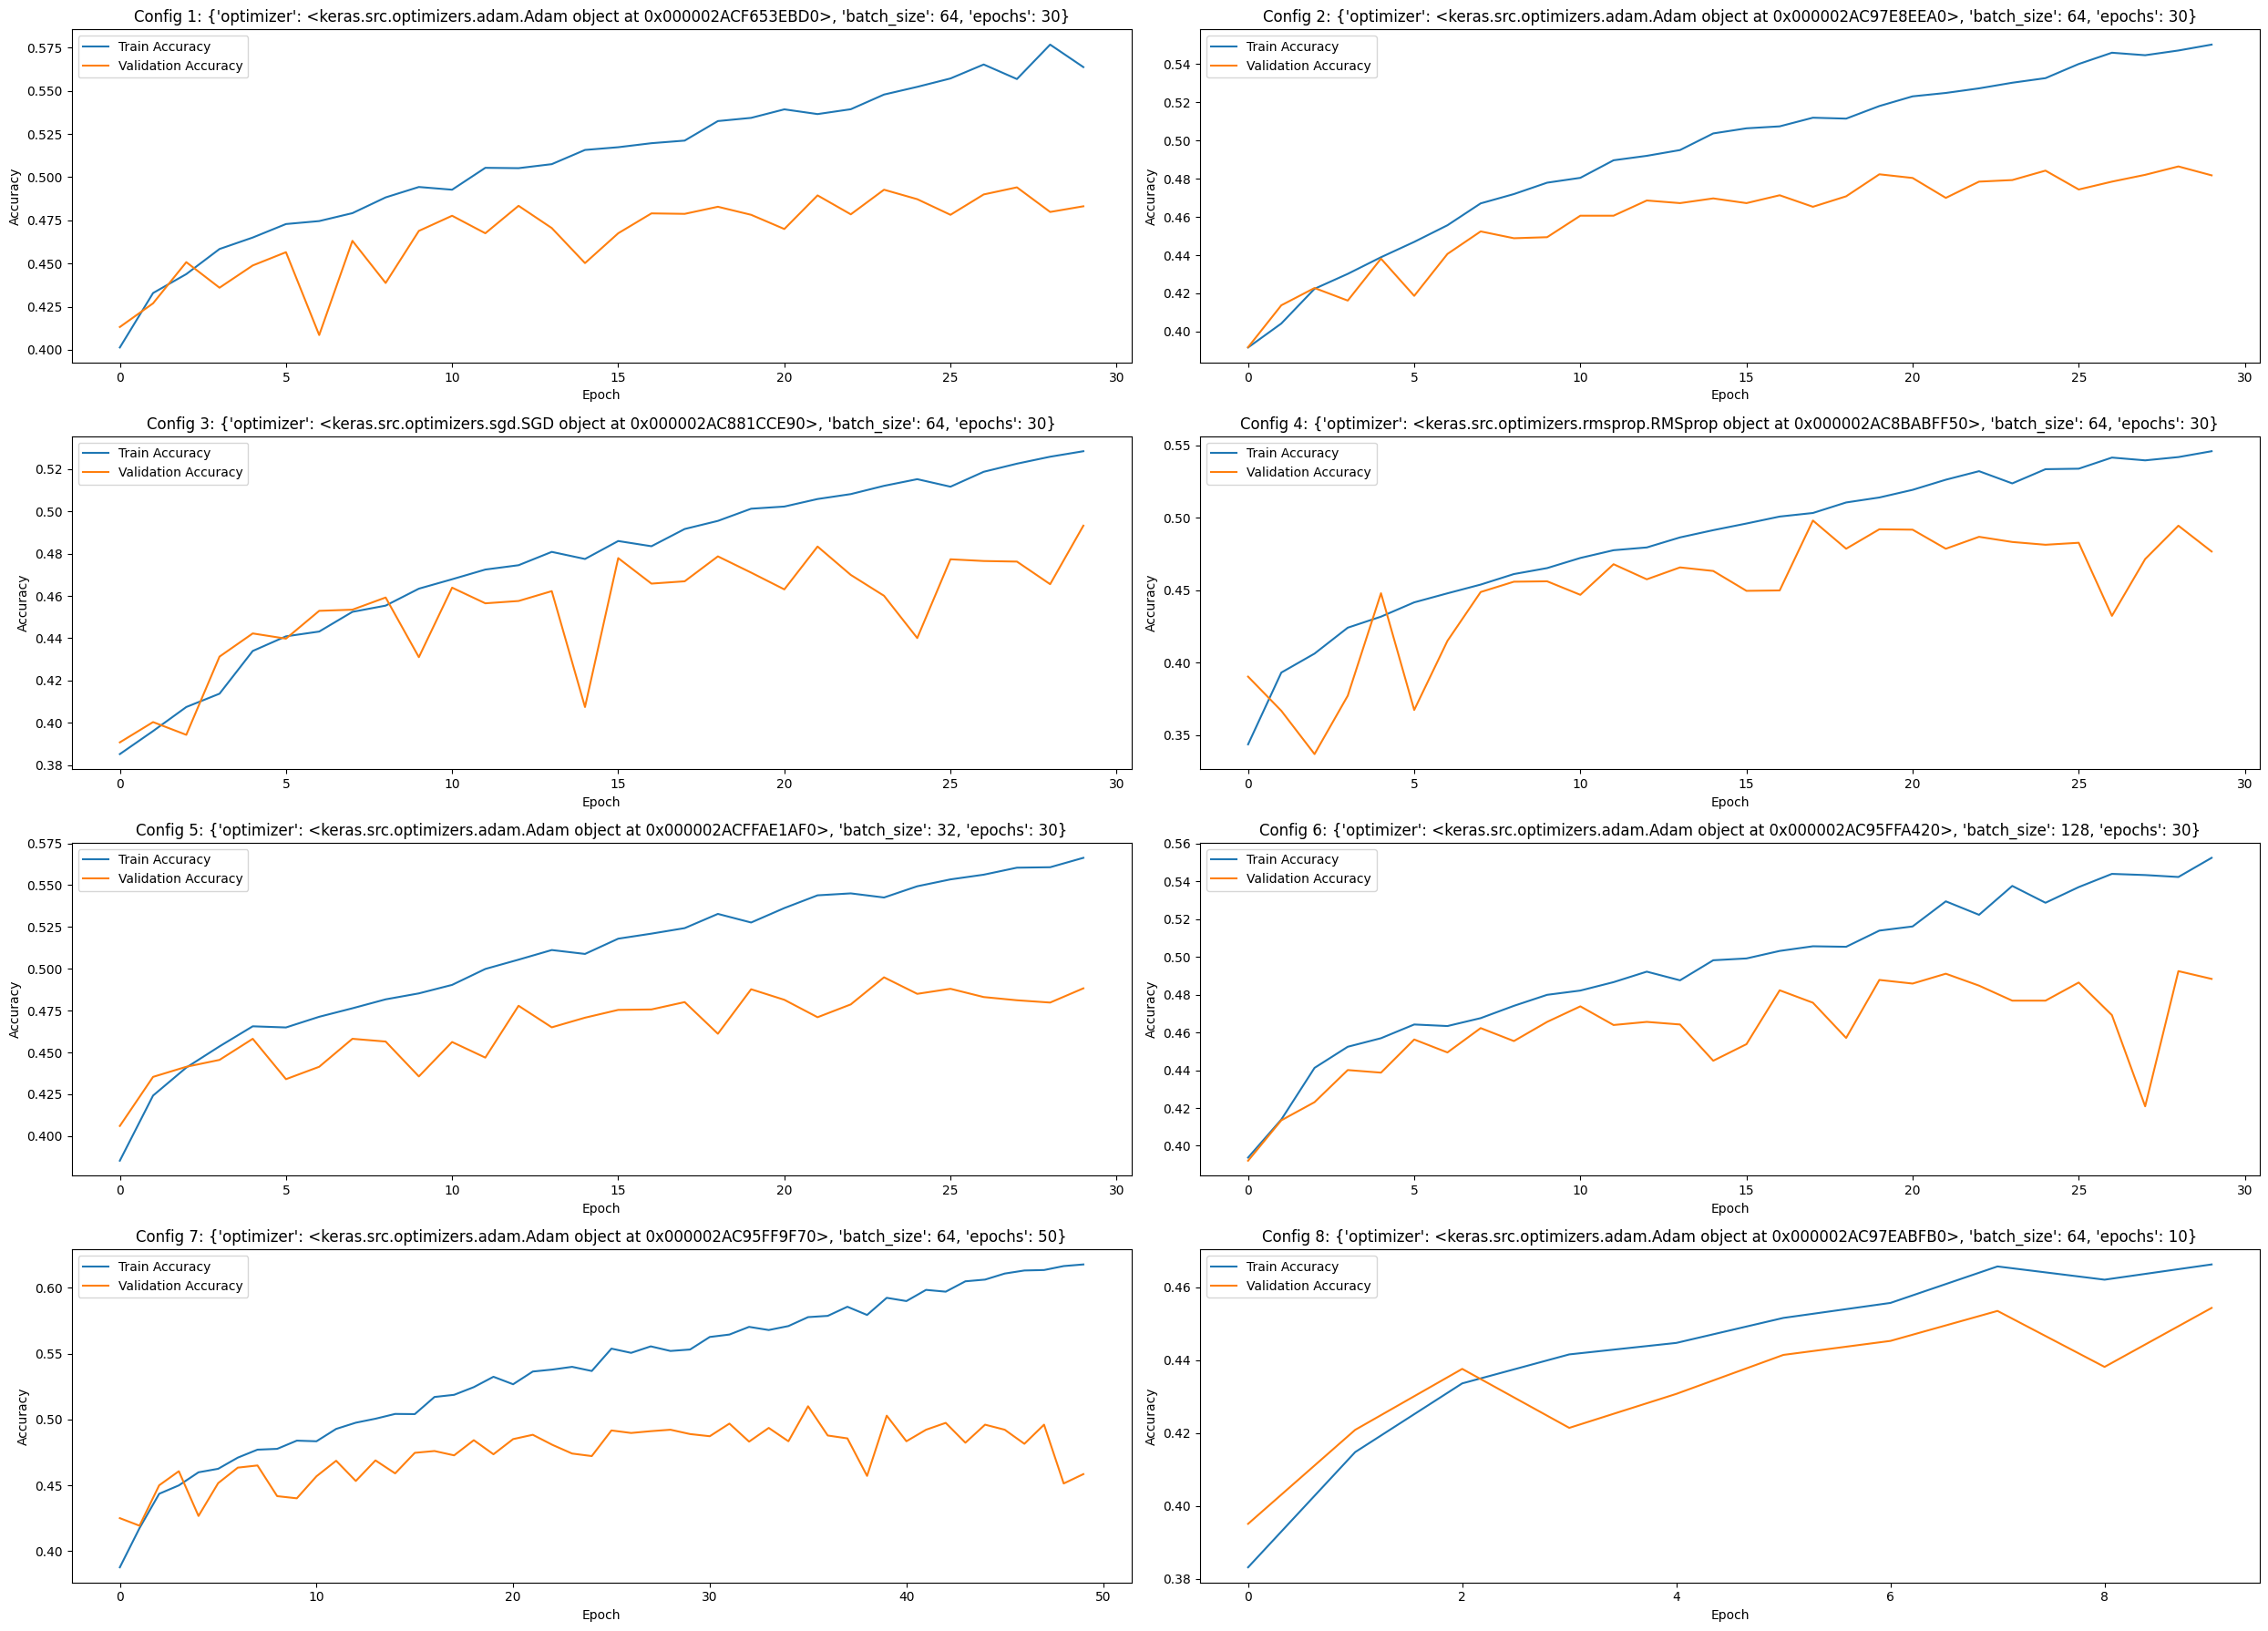

In [9]:
plt.figure(figsize=(25, 18))

for i, result in enumerate(results):
    plt.subplot(4, 2, i+1)
    plt.plot(result['history']['accuracy'], label='Train Accuracy')
    plt.plot(result['history']['val_accuracy'], label='Validation Accuracy')
    plt.title(f"Config {i+1}: {result['config']}")
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

plt.tight_layout()
plt.show()

# Here are the same plots, but the second plot is the same as below but bigger:::

As anticipated, both ADAM and SGD optimizers outperformed others, with ADAM exhibiting superior performance compared to SGD, despite SGD having a higher learning rate. The advantage of ADAM over other optimizers lies in its utilization of additional terms, such as adaptive learning rates for each parameter, which accelerates the convergence process.

### the effect of `learning rate`:


C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
354/354 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.2333 - loss: 1.7785 - val_accuracy: 0.2476 - val_loss: 1.7527
Epoch 2/30
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2606 - loss: 1.7306 - val_accuracy: 0.2981 - val_loss: 1.6887
Epoch 3/30
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3075 - loss: 1.6680 - val_accuracy: 0.3169 - val_loss: 1.6663
Epoch 4/30
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3219 - loss: 1.6501 - val_accuracy: 0.3192 - val_loss: 1.6564
Epoch 5/30
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3360 - loss: 1.6350 - val_accuracy: 0.3305 - val_loss: 1.6419
Epoch 6/30
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3500 - loss: 1.6149 - val_accuracy: 0.3351 - val_loss: 1.6382
Epoch 7/30
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3496 - loss: 1.6059 - val_accuracy: 0.3492 - val_loss: 1.6082
Epoch 8/30
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3595 - loss: 1.5874 - val_accuracy: 0.

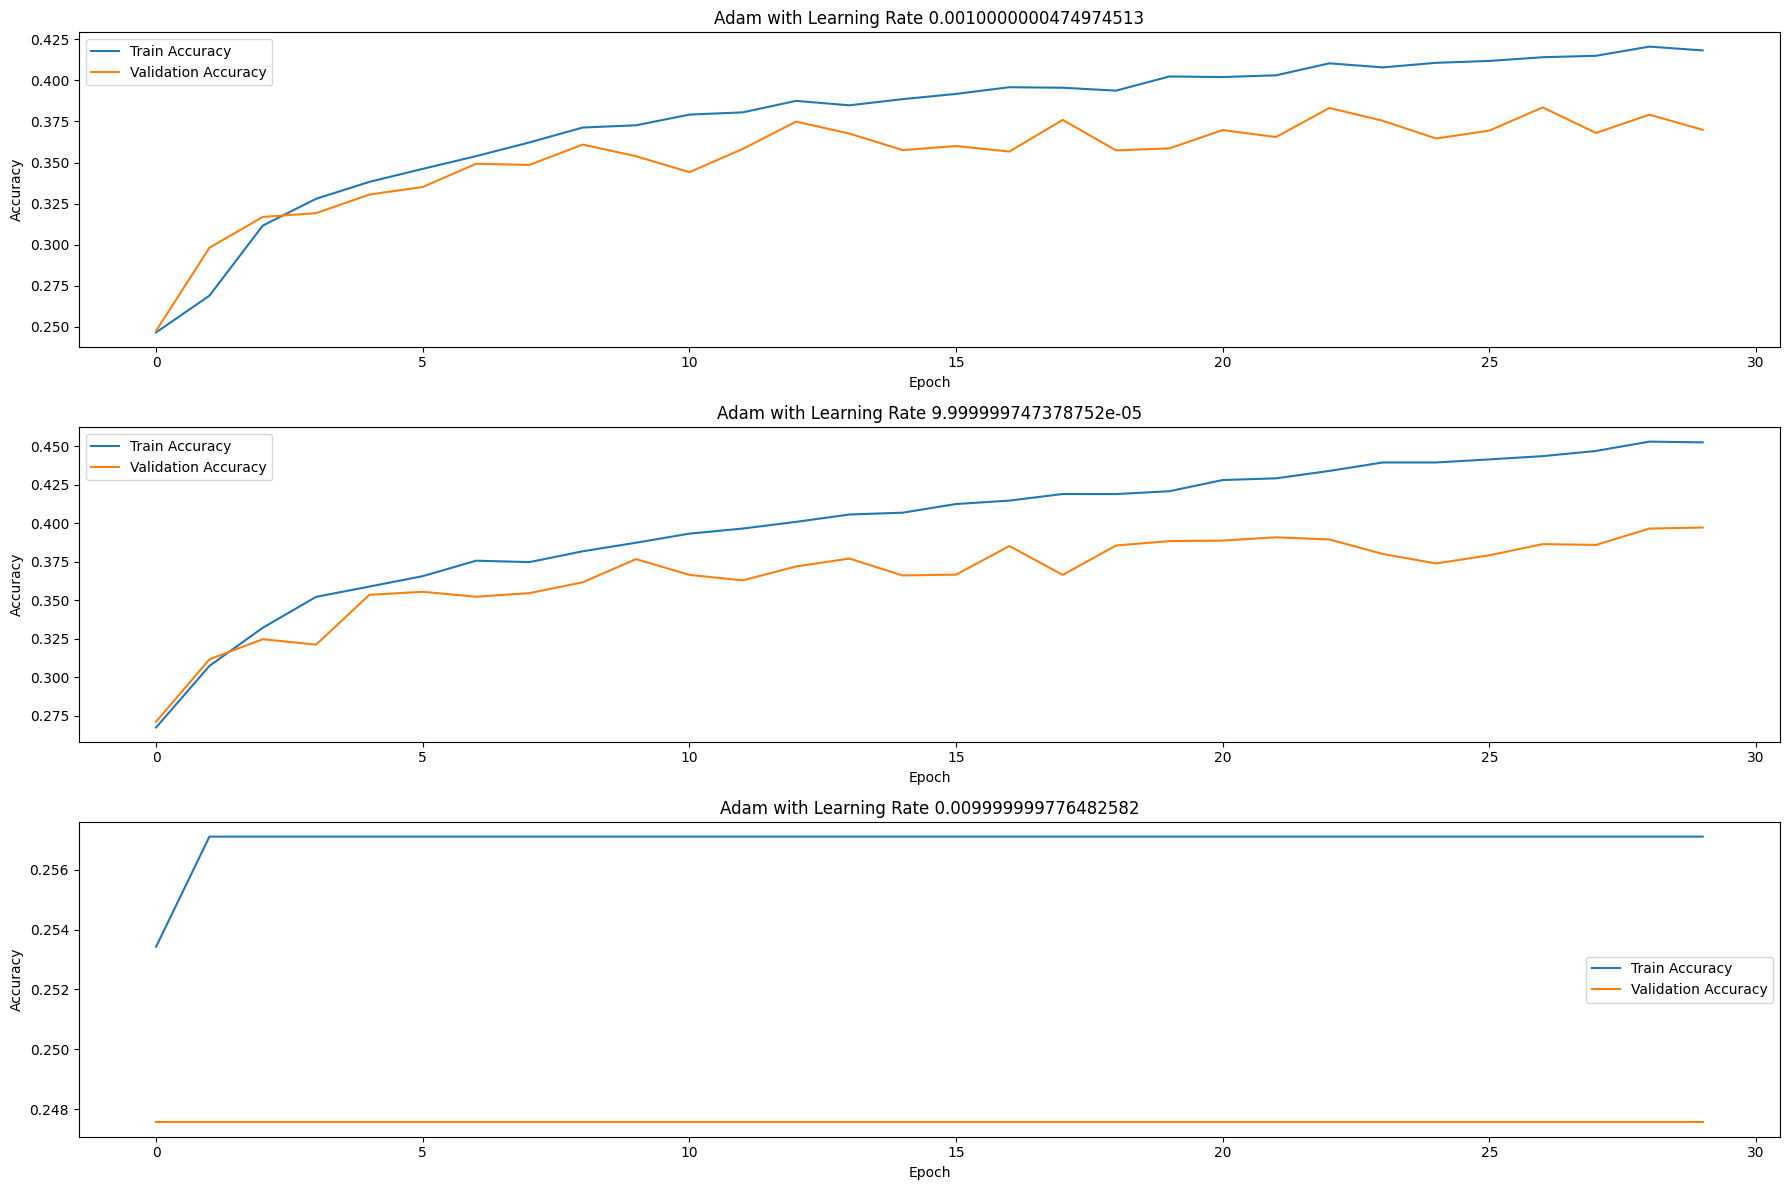

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
from keras.preprocessing.image import load_img, img_to_array
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import Adam
from sklearn.utils import shuffle

# Class labels
emotion_labels = {
    0: "Angry",
    1: "Disgust",
    2: "Fear",
    3: "Happy",
    4: "Sad",
    5: "Surprise",
    6: "Neutral"
}

def load_data(data_dir, exclude_class=1):
    images, labels = [], []
    for label, emotion in emotion_labels.items():
        if label == exclude_class:  # Skip "Disgust" class
            continue
        emotion_dir = os.path.join(data_dir, emotion)
        
        if not os.path.exists(emotion_dir):
            print(f"Directory not found: {emotion_dir}")
            continue
        
        for file_name in os.listdir(emotion_dir):
            img_path = os.path.join(emotion_dir, file_name)
            img = load_img(img_path, target_size=(48, 48), color_mode="grayscale")
            img_array = img_to_array(img) / 255.0
            images.append(img_array)
            labels.append(label)
    
    images, labels = np.array(images), np.array(labels)
    return shuffle(images, labels, random_state=42)

data_path = "C:\\Users\\USER\\Downloads\\FER-2013\\"
train_path = os.path.join(data_path, "train")
test_path = os.path.join(data_path, "test")

X_train, y_train = load_data(train_path)
X_test, y_test = load_data(test_path)

# Adjust labels to account for excluding the "Disgust" class
y_train = np.where(y_train > 1, y_train - 1, y_train)
y_test = np.where(y_test > 1, y_test - 1, y_test)

# Convert labels to one-hot encoding
num_classes = len(emotion_labels) - 1  # Exclude "Disgust"
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

def create_model():
    model = Sequential([
        Flatten(input_shape=(48, 48, 1)),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    return model

# Experiment configurations
configs = [
    {'optimizer': Adam(learning_rate=0.001), 'batch_size': 64, 'epochs': 30},
    {'optimizer': Adam(learning_rate=0.0001), 'batch_size': 64, 'epochs': 30},
    {'optimizer': Adam(learning_rate=0.01), 'batch_size': 64, 'epochs': 30},
]

# Store results
results = []

for config in configs:
    model = create_model()
    model.compile(optimizer=config['optimizer'], 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])
    
    history = model.fit(X_train, y_train, 
                        validation_split=0.2, 
                        epochs=config['epochs'], 
                        batch_size=config['batch_size'], 
                        verbose=1)
    
    results.append({
        'config': config,
        'history': history.history
    })

# Plot results
plt.figure(figsize=(18, 12))

for i, result in enumerate(results):
    plt.subplot(3, 1, i+1)
    plt.plot(result['history']['accuracy'], label='Train Accuracy')
    plt.plot(result['history']['val_accuracy'], label='Validation Accuracy')
    plt.title(f"Adam with Learning Rate {result['config']['optimizer'].learning_rate.numpy()}")
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

plt.tight_layout()
plt.show()


# The effect of `batch size` 
Batch size plays a critical role in training machine learning models. If the batch size is too small, the noise in the gradient updates increases, potentially leading to less accurate models. However, smaller batch sizes require fewer computations per update, which can make training faster for limited hardware resources.

On the other hand, if the batch size is too large, the noise in the gradients decreases, leading to more stable and accurate updates. However, larger batch sizes demand significantly more memory, which can lead to hardware limitations or memory crashes.

Therefore, selecting an optimal batch size is crucial. In our observations, the model with the smallest batch size demonstrated the least accuracy. Conversely, the model trained with a moderate batch size of 64 achieved the best performance, balancing stability and accuracy effectively.

Epoch 1/30
707/707 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.2469 - loss: 1.7723 - val_accuracy: 0.3038 - val_loss: 1.6921 - learning_rate: 0.0010
Epoch 2/30
707/707 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3113 - loss: 1.6824 - val_accuracy: 0.3125 - val_loss: 1.6679 - learning_rate: 0.0010
Epoch 3/30
707/707 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3363 - loss: 1.6376 - val_accuracy: 0.3390 - val_loss: 1.6306 - learning_rate: 0.0010
Epoch 4/30
707/707 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3522 - loss: 1.6116 - val_accuracy: 0.3294 - val_loss: 1.6469 - learning_rate: 0.0010
Epoch 5/30
707/707 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3582 - loss: 1.5985 - val_accuracy: 0.3374 - val_loss: 1.6287 - learning_rate: 0.0010
Epoch 6/30
707/707 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3634 - loss: 1.5891 - val_accuracy: 0.3379 - val_loss: 1.6365 - learning_rate: 0.0010
Epoch 7/30
707/707 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3664 - loss: 1.5817 - 

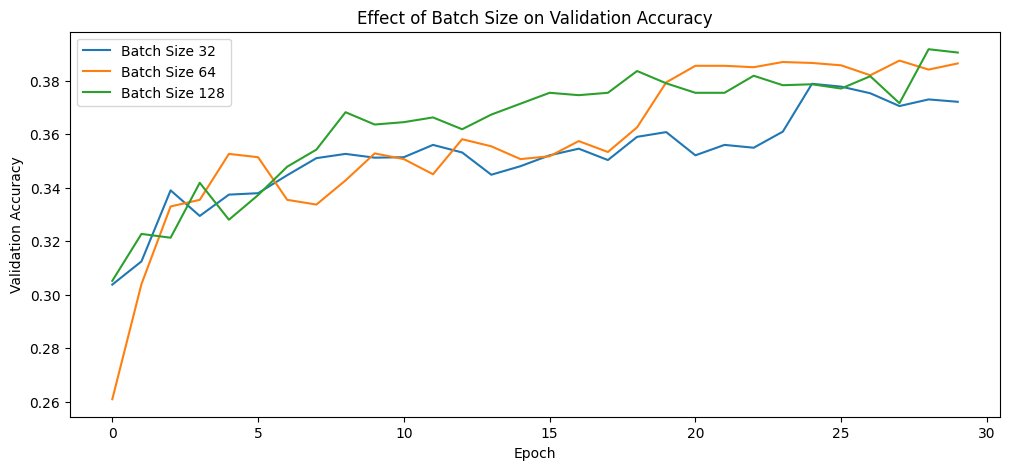

In [17]:
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img, img_to_array
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
from sklearn.utils import shuffle
import tensorflow as tf

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Function to create the model
def create_model():
    model = Sequential([
        Flatten(input_shape=(48, 48, 1)),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    return model

def plot_results(results, title):
    plt.figure(figsize=(12, 5))
    for result in results:
        plt.plot(result['history']['val_accuracy'], label=result['label'])
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Validation Accuracy')
    plt.legend()
    plt.show()

# Define the learning rate scheduler
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)

# Plot the effect of batch size
batch_sizes = [32, 64, 128]
results_bs = []

for bs in batch_sizes:
    model = create_model()
    model.compile(optimizer=Adam(learning_rate=0.001), 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])
    
    history = model.fit(X_train, y_train, 
                        validation_split=0.2, 
                        epochs=30, 
                        batch_size=bs, 
                        verbose=1,
                        callbacks=[reduce_lr])
    
    results_bs.append({
        'label': f'Batch Size {bs}',
        'history': history.history
    })

plot_results(results_bs, 'Effect of Batch Size on Validation Accuracy')


Epoch 1/10
354/354 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2491 - loss: 1.7683 - val_accuracy: 0.3111 - val_loss: 1.6752
Epoch 2/10
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3216 - loss: 1.6673 - val_accuracy: 0.3183 - val_loss: 1.6649
Epoch 3/10
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3386 - loss: 1.6388 - val_accuracy: 0.3462 - val_loss: 1.6283
Epoch 4/10
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3466 - loss: 1.6167 - val_accuracy: 0.3413 - val_loss: 1.6247
Epoch 5/10
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3522 - loss: 1.6018 - val_accuracy: 0.3459 - val_loss: 1.6188
Epoch 6/10
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3601 - loss: 1.5881 - val_accuracy: 0.3381 - val_loss: 1.6257
Epoch 7/10
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3632 - loss: 1.5810 - val_accuracy: 0.3360 - val_loss: 1.6193
Epoch 8/10
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3701 - loss: 1.5694 - val_accuracy: 0.

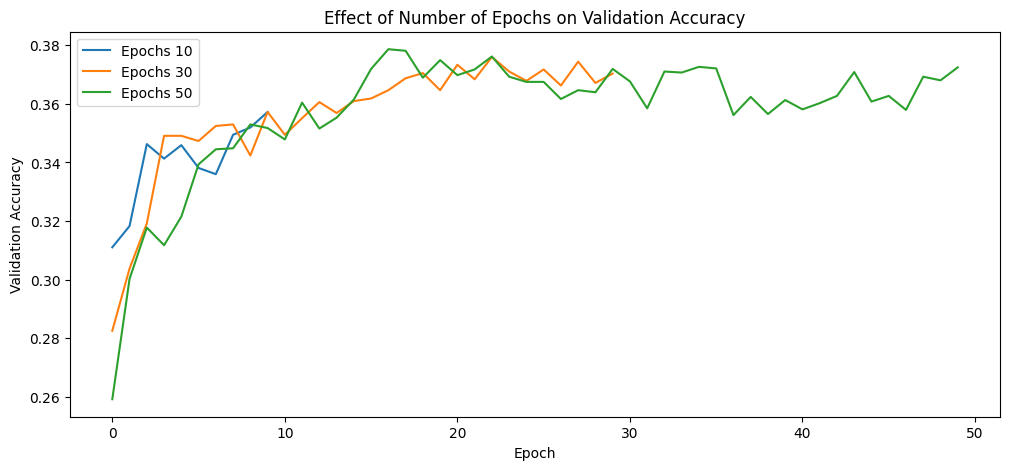

In [18]:
# Plot the effect of number of epochs
epoch_numbers = [10, 30, 50]
results_epochs = []

for epochs in epoch_numbers:
    model = create_model()
    model.compile(optimizer=Adam(learning_rate=0.001), 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])
    
    history = model.fit(X_train, y_train, 
                        validation_split=0.2, 
                        epochs=epochs, 
                        batch_size=64, 
                        verbose=1)
    
    results_epochs.append({
        'label': f'Epochs {epochs}',
        'history': history.history
    })

plot_results(results_epochs, 'Effect of Number of Epochs on Validation Accuracy')


### The effect of `Optimizers`:
As anticipated, both ADAM and SGD optimizers outperformed others, with ADAM exhibiting superior performance compared to SGD, despite SGD having a higher learning rate. The advantage of ADAM over other optimizers lies in its utilization of additional terms, such as adaptive learning rates for each parameter, which accelerates the convergence process.

Epoch 1/30
354/354 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2462 - loss: 1.7746 - val_accuracy: 0.2698 - val_loss: 1.7262
Epoch 2/30
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2956 - loss: 1.7016 - val_accuracy: 0.3151 - val_loss: 1.6798
Epoch 3/30
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3331 - loss: 1.6442 - val_accuracy: 0.2877 - val_loss: 1.7242
Epoch 4/30
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3343 - loss: 1.6315 - val_accuracy: 0.3372 - val_loss: 1.6400
Epoch 5/30
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3524 - loss: 1.6040 - val_accuracy: 0.3441 - val_loss: 1.6238
Epoch 6/30
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3586 - loss: 1.5872 - val_accuracy: 0.3484 - val_loss: 1.6127
Epoch 7/30
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3612 - loss: 1.5800 - val_accuracy: 0.3420 - val_loss: 1.6074
Epoch 8/30
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3677 - loss: 1.5634 - val_accuracy: 0.

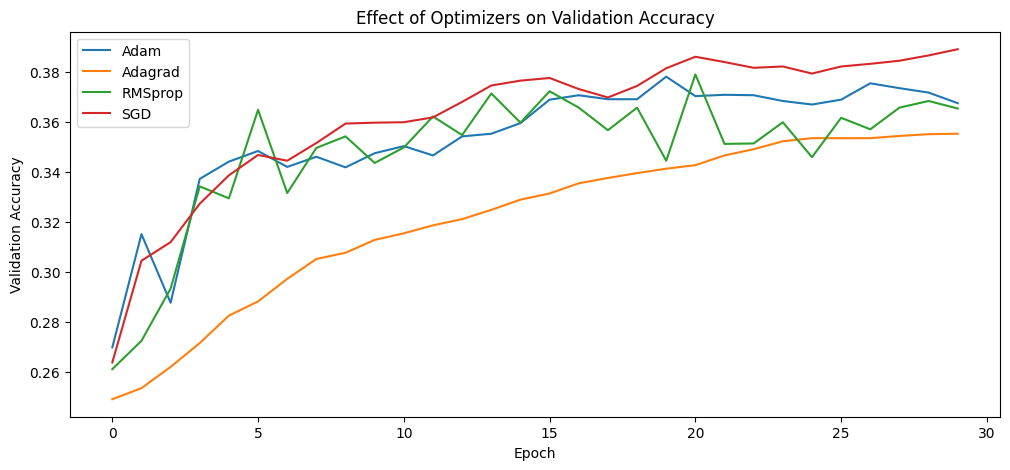

In [19]:
# Plot the effect of optimizers
optimizers = {
    'Adam': Adam(learning_rate=0.001),
    'Adagrad': Adagrad(learning_rate=0.001),
    'RMSprop': RMSprop(learning_rate=0.001),
    'SGD': SGD(learning_rate=0.01)
}
results_optimizers = []

for opt_name, opt in optimizers.items():
    model = create_model()
    model.compile(optimizer=opt, 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])
    
    history = model.fit(X_train, y_train, 
                        validation_split=0.2, 
                        epochs=30, 
                        batch_size=64, 
                        verbose=1)
    
    results_optimizers.append({
        'label': opt_name,
        'history': history.history
    })

plot_results(results_optimizers, 'Effect of Optimizers on Validation Accuracy')


- Design a CNN for emotion classification. The network should have a maximum of 4 convolutional layers, several pooling layers, and a maximum of 3 fully connected (FC) layers. The choice of batch size, number of epochs, optimizer type, and learning rate is up to you. Plot the loss and accuracy of your best model (with the highest accuracy or lowest loss on the validation data). Evaluate this model on the test data and display the confusion matrix. In this section, you must examine at least 4 different configurations and report the results. Finally, select the best model from the configurations examined.

C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
707/707 ━━━━━━━━━━━━━━━━━━━━ 38s 48ms/step - accuracy: 0.2496 - loss: 1.7642 - val_accuracy: 0.2990 - val_loss: 1.6508
Epoch 2/30
707/707 ━━━━━━━━━━━━━━━━━━━━ 33s 47ms/step - accuracy: 0.3456 - loss: 1.6087 - val_accuracy: 0.4263 - val_loss: 1.4443
Epoch 3/30
707/707 ━━━━━━━━━━━━━━━━━━━━ 32s 46ms/step - accuracy: 0.4204 - loss: 1.4509 - val_accuracy: 0.4693 - val_loss: 1.3393
Epoch 4/30
707/707 ━━━━━━━━━━━━━━━━━━━━ 30s 43ms/step - accuracy: 0.4565 - loss: 1.3857 - val_accuracy: 0.4882 - val_loss: 1.2979
Epoch 5/30
707/707 ━━━━━━━━━━━━━━━━━━━━ 31s 43ms/step - accuracy: 0.4777 - loss: 1.3231 - val_accuracy: 0.5082 - val_loss: 1.2653
Epoch 6/30
707/707 ━━━━━━━━━━━━━━━━━━━━ 31s 44ms/step - accuracy: 0.4986 - loss: 1.2856 - val_accuracy: 0.5061 - val_loss: 1.2530
Epoch 7/30
707/707 ━━━━━━━━━━━━━━━━━━━━ 30s 43ms/step - accuracy: 0.5140 - loss: 1.2476 - val_accuracy: 0.5273 - val_loss: 1.2053
Epoch 8/30
707/707 ━━━━━━━━━━━━━━━━━━━━ 30s 43ms/step - accuracy: 0.5282 - loss: 1.2079 - 

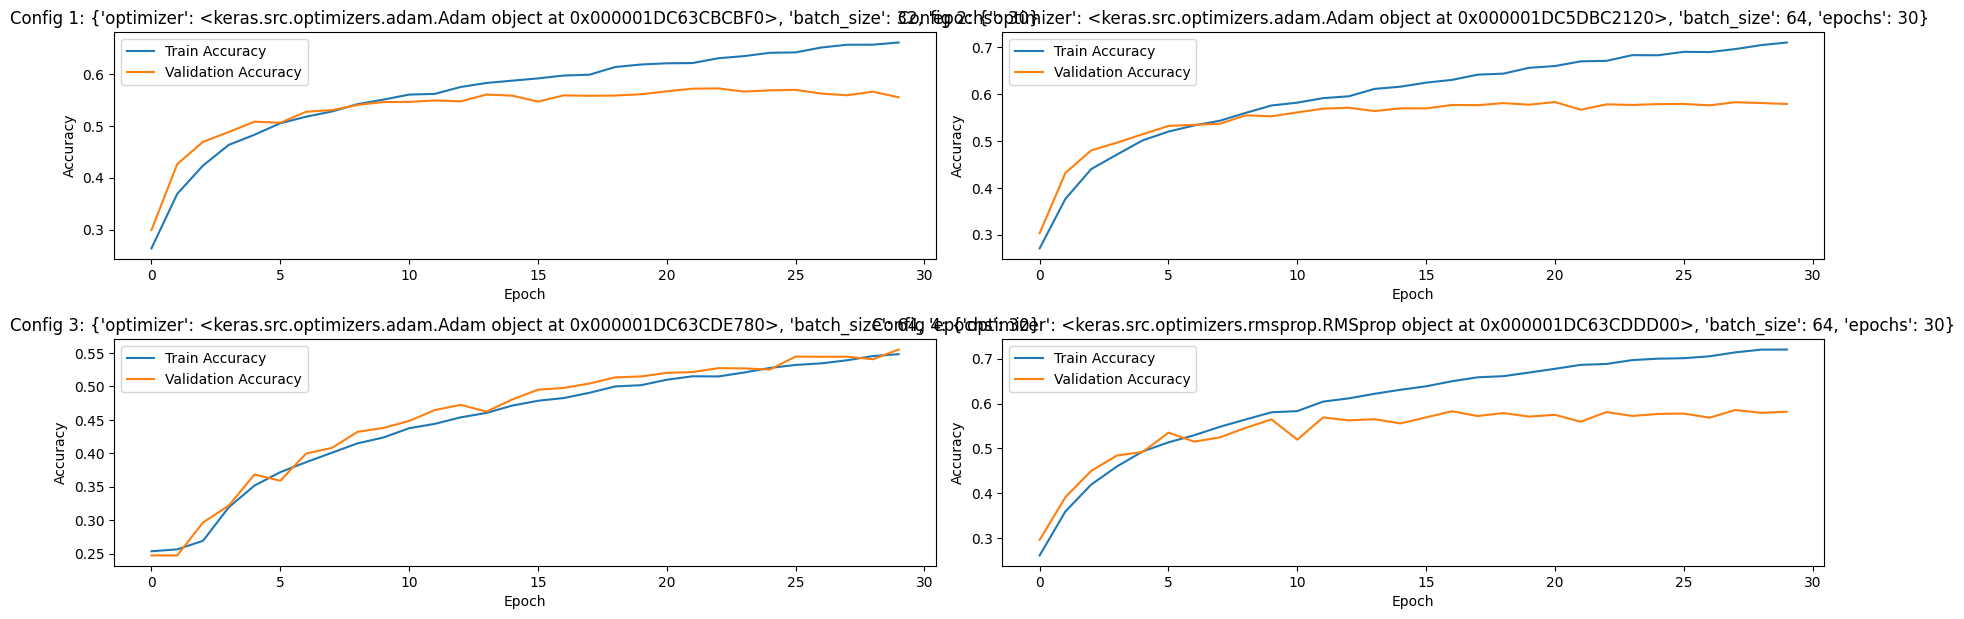

Best Configuration: {'optimizer': <keras.src.optimizers.rmsprop.RMSprop object at 0x000001DC63CDDD00>, 'batch_size': 64, 'epochs': 30}
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5712 - loss: 1.1960
Test Loss: 1.1552495956420898
Test Accuracy: 0.5774129629135132
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


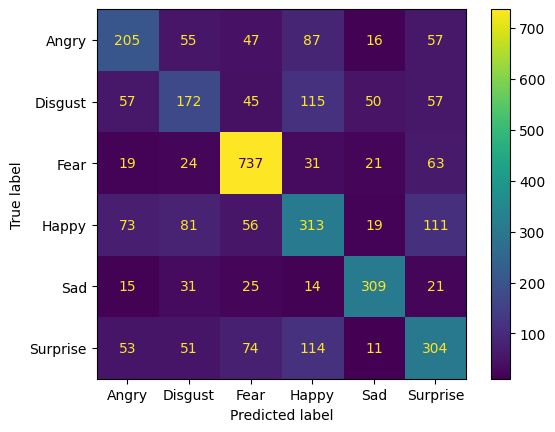

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import os
from keras.preprocessing.image import load_img, img_to_array
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.optimizers import Adam, SGD, RMSprop
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils import shuffle

# Class labels
emotion_labels = {
    0: "Angry",
    1: "Disgust",
    2: "Fear",
    3: "Happy",
    4: "Sad",
    5: "Surprise",
    6: "Neutral"
}

def load_data(data_dir, exclude_class=1):
    images, labels = [], []
    for label, emotion in emotion_labels.items():
        if label == exclude_class:  # Skip "Disgust" class
            continue
        emotion_dir = os.path.join(data_dir, emotion)
        
        if not os.path.exists(emotion_dir):
            print(f"Directory not found: {emotion_dir}")
            continue
        
        for file_name in os.listdir(emotion_dir):
            img_path = os.path.join(emotion_dir, file_name)
            img = load_img(img_path, target_size=(48, 48), color_mode="grayscale")
            img_array = img_to_array(img) / 255.0
            images.append(img_array)
            labels.append(label)
    
    images, labels = np.array(images), np.array(labels)
    return shuffle(images, labels, random_state=42)

data_path = "C:\\Users\\USER\\Downloads\\FER-2013\\"
train_path = os.path.join(data_path, "train")
test_path = os.path.join(data_path, "test")

X_train, y_train = load_data(train_path)
X_test, y_test = load_data(test_path)

# Adjust labels to account for excluding the "Disgust" class
y_train = np.where(y_train > 1, y_train - 1, y_train)
y_test = np.where(y_test > 1, y_test - 1, y_test)

# Convert labels to one-hot encoding
num_classes = len(emotion_labels) - 1  # Exclude "Disgust"
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

def create_cnn_model():
    model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),
        Conv2D(128, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),
        Conv2D(256, kernel_size=(3, 3), activation='relu'),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    return model

# Experiment configurations
configs = [
    {'optimizer': Adam(learning_rate=0.001), 'batch_size': 32, 'epochs': 30},
    {'optimizer': Adam(learning_rate=0.001), 'batch_size': 64, 'epochs': 30},
    {'optimizer': Adam(learning_rate=0.0001), 'batch_size': 64, 'epochs': 30},
    {'optimizer': RMSprop(learning_rate=0.001), 'batch_size': 64, 'epochs': 30}
]

# Store results
results = []

for config in configs:
    model = create_cnn_model()
    model.compile(optimizer=config['optimizer'], 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])
    
    history = model.fit(X_train, y_train, 
                        validation_split=0.2, 
                        epochs=config['epochs'], 
                        batch_size=config['batch_size'], 
                        verbose=1)
    
    results.append({
        'config': config,
        'history': history.history,
        'model': model
    })

# Plot results
plt.figure(figsize=(18, 12))

for i, result in enumerate(results):
    plt.subplot(4, 2, i+1)
    plt.plot(result['history']['accuracy'], label='Train Accuracy')
    plt.plot(result['history']['val_accuracy'], label='Validation Accuracy')
    plt.title(f"Config {i+1}: {result['config']}")
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

plt.tight_layout()
plt.show()

# Evaluate the best model on test data and display confusion matrix
best_model = results[0]['model']
best_config = results[0]['config']
best_val_accuracy = max(results[0]['history']['val_accuracy'])

for result in results:
    val_accuracy = max(result['history']['val_accuracy'])
    if val_accuracy > best_val_accuracy:
        best_model = result['model']
        best_config = result['config']
        best_val_accuracy = val_accuracy

print(f"Best Configuration: {best_config}")
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

y_pred = best_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true_classes, y_pred_classes)
ConfusionMatrixDisplay(cm, display_labels=list(emotion_labels.values())[:-1]).plot()
plt.show()



### Model Evaluation on Test Data 
- The model is evaluated on the test data.
- Test loss and accuracy are printed. 
- Confusion Matrix 
- Predictions are made on the test data. - The predicted classes and true classes are extracted. 
- A confusion matrix is generated and displayed to visualize the performance of the model on different classes. 
 ### The effect of `Drop out`
 The code trains a CNN on the FER-2013 dataset (excluding the "Disgust" class), evaluates its performance, and visualizes the results through accuracy/loss plots and a confusion matrix.
 Once we trained the model with drop out technique and the other time we trained the model without the drop out, in below lies the results and explanation of our observation and reasoning.
 
- The left subplot shows training and validation accuracy over epochs. 
- The right subplot shows training and validation loss over epochs. 

running on cuda


C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
354/354 ━━━━━━━━━━━━━━━━━━━━ 18s 37ms/step - accuracy: 0.2721 - loss: 1.7285 - val_accuracy: 0.4021 - val_loss: 1.5003
Epoch 2/30
354/354 ━━━━━━━━━━━━━━━━━━━━ 23s 66ms/step - accuracy: 0.4352 - loss: 1.4224 - val_accuracy: 0.4615 - val_loss: 1.3713
Epoch 3/30
354/354 ━━━━━━━━━━━━━━━━━━━━ 24s 67ms/step - accuracy: 0.4977 - loss: 1.2745 - val_accuracy: 0.5100 - val_loss: 1.2668
Epoch 4/30
354/354 ━━━━━━━━━━━━━━━━━━━━ 25s 72ms/step - accuracy: 0.5456 - loss: 1.1707 - val_accuracy: 0.5271 - val_loss: 1.2335
Epoch 5/30
354/354 ━━━━━━━━━━━━━━━━━━━━ 26s 72ms/step - accuracy: 0.5780 - loss: 1.0920 - val_accuracy: 0.5349 - val_loss: 1.2071
Epoch 6/30
354/354 ━━━━━━━━━━━━━━━━━━━━ 25s 71ms/step - accuracy: 0.6046 - loss: 1.0290 - val_accuracy: 0.5447 - val_loss: 1.2043
Epoch 7/30
354/354 ━━━━━━━━━━━━━━━━━━━━ 26s 73ms/step - accuracy: 0.6294 - loss: 0.9643 - val_accuracy: 0.5560 - val_loss: 1.1749
Epoch 8/30
354/354 ━━━━━━━━━━━━━━━━━━━━ 25s 70ms/step - accuracy: 0.6656 - loss: 0.8871 - 

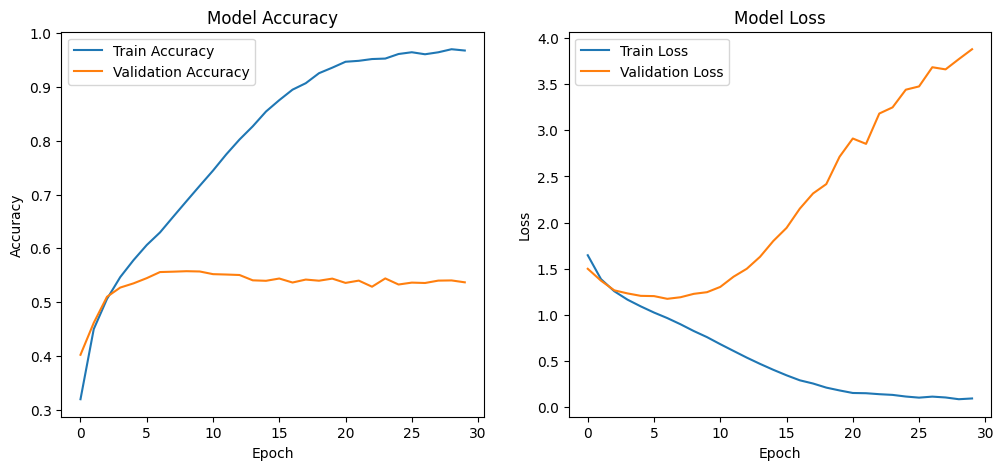

111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.5332 - loss: 4.0709
Test Loss: 3.854559898376465
Test Accuracy: 0.5431644320487976
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step


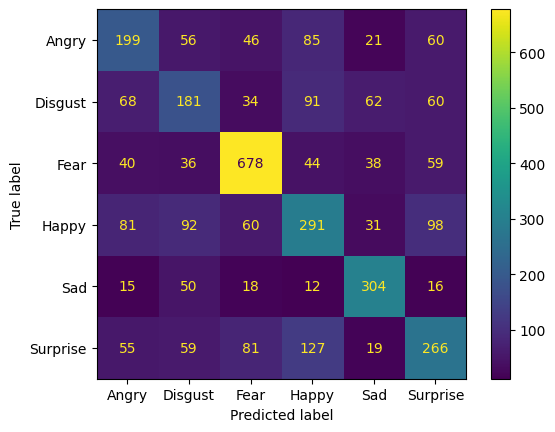

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import os
import torch
from keras.preprocessing.image import load_img, img_to_array
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils import shuffle

# Class labels
emotion_labels = {
    0: "Angry",
    1: "Disgust",
    2: "Fear",
    3: "Happy",
    4: "Sad",
    5: "Surprise",
    6: "Neutral"
}

if torch.cuda.is_available():
    torch.device = 'cuda'
else:
    torch.device = 'cpu'
print(f'running on {torch.device}')

def load_data(data_dir, exclude_class=1):
    images, labels = [], []
    for label, emotion in emotion_labels.items():
        if label == exclude_class:  # Skip "Disgust" class
            continue
        emotion_dir = os.path.join(data_dir, emotion)
        
        if not os.path.exists(emotion_dir):
            print(f"Directory not found: {emotion_dir}")
            continue
        
        for file_name in os.listdir(emotion_dir):
            img_path = os.path.join(emotion_dir, file_name)
            img = load_img(img_path, target_size=(48, 48), color_mode="grayscale")
            img_array = img_to_array(img) / 255.0
            images.append(img_array)
            labels.append(label)
    
    images, labels = np.array(images), np.array(labels)
    return shuffle(images, labels, random_state=42)

data_path = "C:\\Users\\USER\\Downloads\\FER-2013\\"
train_path = os.path.join(data_path, "train")
test_path = os.path.join(data_path, "test")

X_train, y_train = load_data(train_path)
X_test, y_test = load_data(test_path)

# Adjust labels to account for excluding the "Disgust" class
y_train = np.where(y_train > 1, y_train - 1, y_train)
y_test = np.where(y_test > 1, y_test - 1, y_test)

# Convert labels to one-hot encoding
num_classes = len(emotion_labels) - 1  # Exclude "Disgust"
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

def create_cnn_model():
    model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(128, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(256, kernel_size=(3, 3), activation='relu'),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    return model

# Configuration for the first experiment
config = {'optimizer': Adam(learning_rate=0.001), 'batch_size': 64, 'epochs': 30}

# Compile and train the model
model = create_cnn_model()
model.compile(optimizer=config['optimizer'], 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(X_train, y_train, 
                    validation_split=0.2, 
                    epochs=config['epochs'], 
                    batch_size=config['batch_size'], 
                    verbose=1)

# Plot the accuracy and loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Generate confusion matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true_classes, y_pred_classes)
ConfusionMatrixDisplay(cm, display_labels=list(emotion_labels.values())[:-1]).plot()
plt.show()


Epoch 1/30


C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


354/354 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.2790 - loss: 1.7208 - val_accuracy: 0.3864 - val_loss: 1.5119
Epoch 2/30
354/354 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.4320 - loss: 1.4274 - val_accuracy: 0.4525 - val_loss: 1.3761
Epoch 3/30
354/354 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.4938 - loss: 1.2890 - val_accuracy: 0.4932 - val_loss: 1.3092
Epoch 4/30
354/354 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.5320 - loss: 1.2034 - val_accuracy: 0.5088 - val_loss: 1.2506
Epoch 5/30
354/354 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.5669 - loss: 1.1129 - val_accuracy: 0.5360 - val_loss: 1.2047
Epoch 6/30
354/354 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.6027 - loss: 1.0451 - val_accuracy: 0.5316 - val_loss: 1.2102
Epoch 7/30
354/354 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.6377 - loss: 0.9595 - val_accuracy: 0.5478 - val_loss: 1.1986
Epoch 8/30
354/354 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.6609 - loss: 0.8905 - val_accuracy: 0.54

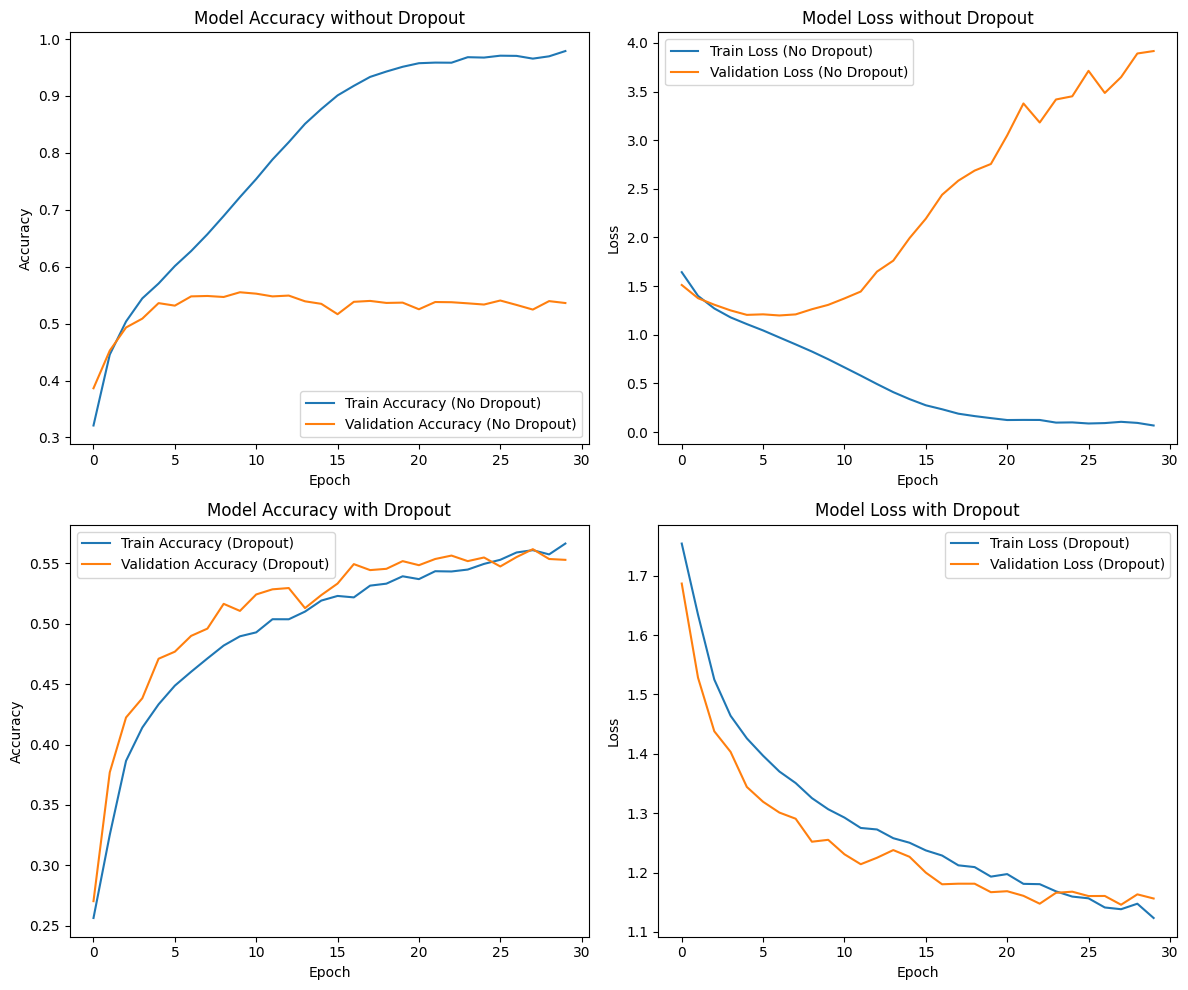

111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5308 - loss: 4.0962
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5370 - loss: 1.1844
Test Accuracy without Dropout: 0.5389187932014465
Test Loss without Dropout: 3.979454517364502
Test Accuracy with Dropout: 0.5575997829437256
Test Loss with Dropout: 1.1452908515930176
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


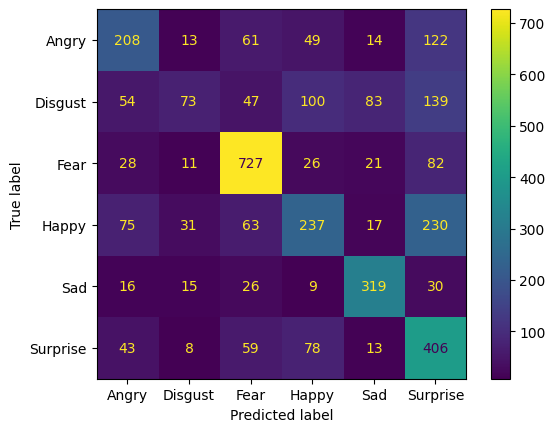

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import os
from keras.preprocessing.image import load_img, img_to_array
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils import shuffle

# Class labels
emotion_labels = {
    0: "Angry",
    1: "Disgust",
    2: "Fear",
    3: "Happy",
    4: "Sad",
    5: "Surprise",
    6: "Neutral"
}

def load_data(data_dir, exclude_class=1):
    images, labels = [], []
    for label, emotion in emotion_labels.items():
        if label == exclude_class:  # Skip "Disgust" class
            continue
        emotion_dir = os.path.join(data_dir, emotion)
        
        if not os.path.exists(emotion_dir):
            print(f"Directory not found: {emotion_dir}")
            continue
        
        for file_name in os.listdir(emotion_dir):
            img_path = os.path.join(emotion_dir, file_name)
            img = load_img(img_path, target_size=(48, 48), color_mode="grayscale")
            img_array = img_to_array(img) / 255.0
            images.append(img_array)
            labels.append(label)
    
    images, labels = np.array(images), np.array(labels)
    return shuffle(images, labels, random_state=42)

data_path = "C:\\Users\\USER\\Downloads\\FER-2013\\"
train_path = os.path.join(data_path, "train")
test_path = os.path.join(data_path, "test")

X_train, y_train = load_data(train_path)
X_test, y_test = load_data(test_path)

# Adjust labels to account for excluding the "Disgust" class
y_train = np.where(y_train > 1, y_train - 1, y_train)
y_test = np.where(y_test > 1, y_test - 1, y_test)

# Convert labels to one-hot encoding
num_classes = len(emotion_labels) - 1  # Exclude "Disgust"
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

def create_cnn_model(dropout_rate=0.0):
    model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(dropout_rate),
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(dropout_rate),
        Conv2D(128, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(dropout_rate),
        Conv2D(256, kernel_size=(3, 3), activation='relu'),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(dropout_rate),
        Dense(num_classes, activation='softmax')
    ])
    return model

# Configuration without dropout
config_without_dropout = {'optimizer': Adam(learning_rate=0.001), 'batch_size': 64, 'epochs': 30, 'dropout_rate': 0.0}

# Compile and train the model without dropout
model_without_dropout = create_cnn_model(dropout_rate=config_without_dropout['dropout_rate'])
model_without_dropout.compile(optimizer=config_without_dropout['optimizer'], 
                              loss='categorical_crossentropy', 
                              metrics=['accuracy'])

history_without_dropout = model_without_dropout.fit(X_train, y_train, 
                                                    validation_split=0.2, 
                                                    epochs=config_without_dropout['epochs'], 
                                                    batch_size=config_without_dropout['batch_size'], 
                                                    verbose=1)

# Configuration with dropout
config_with_dropout = {'optimizer': Adam(learning_rate=0.001), 'batch_size': 64, 'epochs': 30, 'dropout_rate': 0.5}

# Compile and train the model with dropout
model_with_dropout = create_cnn_model(dropout_rate=config_with_dropout['dropout_rate'])
model_with_dropout.compile(optimizer=config_with_dropout['optimizer'], 
                           loss='categorical_crossentropy', 
                           metrics=['accuracy'])

history_with_dropout = model_with_dropout.fit(X_train, y_train, 
                                              validation_split=0.2, 
                                              epochs=config_with_dropout['epochs'], 
                                              batch_size=config_with_dropout['batch_size'], 
                                              verbose=1)

# Plot the accuracy and loss for both models
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plt.plot(history_without_dropout.history['accuracy'], label='Train Accuracy (No Dropout)')
plt.plot(history_without_dropout.history['val_accuracy'], label='Validation Accuracy (No Dropout)')
plt.title('Model Accuracy without Dropout')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(history_without_dropout.history['loss'], label='Train Loss (No Dropout)')
plt.plot(history_without_dropout.history['val_loss'], label='Validation Loss (No Dropout)')
plt.title('Model Loss without Dropout')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(history_with_dropout.history['accuracy'], label='Train Accuracy (Dropout)')
plt.plot(history_with_dropout.history['val_accuracy'], label='Validation Accuracy (Dropout)')
plt.title('Model Accuracy with Dropout')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(history_with_dropout.history['loss'], label='Train Loss (Dropout)')
plt.plot(history_with_dropout.history['val_loss'], label='Validation Loss (Dropout)')
plt.title('Model Loss with Dropout')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate both models on test data
test_loss_without_dropout, test_accuracy_without_dropout = model_without_dropout.evaluate(X_test, y_test)
test_loss_with_dropout, test_accuracy_with_dropout = model_with_dropout.evaluate(X_test, y_test)

print(f"Test Accuracy without Dropout: {test_accuracy_without_dropout}")
print(f"Test Loss without Dropout: {test_loss_without_dropout}")
print(f"Test Accuracy with Dropout: {test_accuracy_with_dropout}")
print(f"Test Loss with Dropout: {test_loss_with_dropout}")

# Generate confusion matrix for the model with dropout
y_pred_with_dropout = model_with_dropout.predict(X_test)
y_pred_classes_with_dropout = np.argmax(y_pred_with_dropout, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true_classes, y_pred_classes_with_dropout)
ConfusionMatrixDisplay(cm, display_labels=list(emotion_labels.values())[:-1]).plot()
plt.show()


Dropout is a technique in machine learning where neurons are randomly turned off during each iteration. This prevents the model from becoming overly reliant on specific neurons, promoting a more distributed representation among other nodes. This technique is essential because it helps manage overfitting. By reducing the number of active neurons, the model becomes less complex, making it harder to overfit the training data.

As demonstrated, the model without dropout overfitted, evidenced by a significantly lower test accuracy compared to the training accuracy. This discrepancy is clear when examining true positives and false positives, further highlighting the benefits of using dropout to improve model generalization.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
from keras.preprocessing.image import load_img, img_to_array
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import Adam, Adagrad, RMSprop, SGD
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils import shuffle

# Class labels
emotion_labels = {
    0: "Angry",
    1: "Disgust",
    2: "Fear",
    3: "Happy",
    4: "Sad",
    5: "Surprise",
    6: "Neutral"
}

def load_data(data_dir, exclude_class=1):
    images, labels = [], []
    for label, emotion in emotion_labels.items():
        if label == exclude_class:  # Skip "Disgust" class
            continue
        emotion_dir = os.path.join(data_dir, emotion)
        
        if not os.path.exists(emotion_dir):
            print(f"Directory not found: {emotion_dir}")
            continue
        
        for file_name in os.listdir(emotion_dir):
            img_path = os.path.join(emotion_dir, file_name)
            img = load_img(img_path, target_size=(48, 48), color_mode="grayscale")
            img_array = img_to_array(img) / 255.0
            images.append(img_array)
            labels.append(label)
    
    images, labels = np.array(images), np.array(labels)
    return shuffle(images, labels, random_state=42)

data_path = "C:\\Users\\USER\\Downloads\\FER-2013\\"
train_path = os.path.join(data_path, "train")
test_path = os.path.join(data_path, "test")

X_train, y_train = load_data(train_path)
X_test, y_test = load_data(test_path)

# Adjust labels to account for excluding the "Disgust" class
y_train = np.where(y_train > 1, y_train - 1, y_train)
y_test = np.where(y_test > 1, y_test - 1, y_test)

# Convert labels to one-hot encoding
num_classes = len(emotion_labels) - 1  # Exclude "Disgust"
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

def create_cnn_model():
    model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(128, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(256, kernel_size=(3, 3), activation='relu'),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    return model

# Experiment configurations
configs = [
    {'optimizer': Adam(learning_rate=0.001), 'batch_size': 64, 'epochs': 30},
    {'optimizer': Adam(learning_rate=0.0001), 'batch_size': 64, 'epochs': 30},
    {'optimizer': Adagrad(learning_rate=0.001), 'batch_size': 64, 'epochs': 30},
    {'optimizer': SGD(learning_rate=0.001), 'batch_size': 32, 'epochs': 30},
    {'optimizer': SGD(learning_rate=0.01), 'batch_size': 64, 'epochs': 30},
]

# Store results
results = []

for config in configs:
    model = create_cnn_model()
    model.compile(optimizer=config['optimizer'], 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])
    
    history = model.fit(X_train, y_train, 
                        validation_split=0.2, 
                        epochs=config['epochs'], 
                        batch_size=config['batch_size'], 
                        verbose=1)
    
    results.append({
        'config': config,
        'history': history.history
    })

# Plot results
plt.figure(figsize=(18, 12))

for i, result in enumerate(results):
    plt.subplot(4, 2, i+1)
    plt.plot(result['history']['accuracy'], label='Train Accuracy')
    plt.plot(result['history']['val_accuracy'], label='Validation Accuracy')
    plt.title(f"Config {i+1}: {result['config']}")
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

plt.tight_layout()
plt.show()

# Find the best model
best_model_index = np.argmax([max(result['history']['val_accuracy']) for result in results])
best_model_config = results[best_model_index]['config']

# Retrain the best model on the full training set and evaluate on test data
best_model = create_cnn_model()
best_model.compile(optimizer=best_model_config['optimizer'], 
                   loss='categorical_crossentropy', 
                   metrics=['accuracy'])
best_model.fit(X_train, y_train, 
               epochs=best_model_config['epochs'], 
               batch_size=best_model_config['batch_size'], 
               verbose=1)
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)

# Generate confusion matrix
y_pred = best_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true_classes, y_pred_classes)
ConfusionMatrixDisplay(cm, display_labels=list(emotion_labels.values())[:-1]).plot()
plt.show()

print(f"Best model configuration: {best_model_config}")
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
